---
title: TSA Python Example
author: Juma Shafara
date: "2024-05"
description: Objective of time series analysis is to understand how change in time affect the dependent variables and accordingly predict values for future time intervals.
keywords: [time series analysis, time series characteristics, trend, seasonality, cyclicity, irregularities]
---

![Photo by DATAIDEA](../../assets/banner4.png)

We have a monthly time series data of the air passengers from 1 Jan 1949 to 1 Dec 1960. Each row contains the air passenger number for a month of that particular year. Objective is to build a model to forecast the air passenger traffic for future months.

<!-- Newsletter -->
<div class="newsletter">
<div class="newsletter-heading">
<h4><i class="bi bi-info-circle-fill"></i> Don't Miss Any Updates!</h4>
</div>
<div class="newsletter-body">
<p>
Before we continue, I have a humble request, to be among the first to hear about future updates of the course materials, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
(formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataidea-science"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>
<iframe class="newsletter-frame" src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no">
</iframe>
</div>
</div>

## Import The Library <a id ="30"></a>
* dataidea: allows us to quickly load most common packages and datasets for the course
* statsmodels: Using statsmodels module classes and functions for time series analysis and forecasting 
   * adfuller: Augmented Dickey-Fuller
   * ACF: Auto Correlation Function
   * PACF: Partial Auto Correlation Function
   * ARIMA: Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
   * sm.tsa.seasonal.seasonal_decompose: For decomposition of time series
* rcParams: To change the matplotlib properties like figure size

In [ ]:
from dataidea.packages import np, pd, plt, sns, sm
from dataidea.datasets import loadDataset # allows us to load datasets
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pylab import rcParams

In [ ]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [ ]:
# load the dataset
data = loadDataset('air_passengers')

# Print the first 5 rows
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Understanding The Data <a id ="31"></a>
* Dataframe `data` contains the time series data. There are two columns `Month` and `Passengers`. `Month` column contains the value of month in that year and passenger column contains the number of air passengers for that particular month.
* As you may have noticed `Month` column datatype is `Object`, so we are going to convert it to `datetime`
* To make plotting easier, we set the index of pandas dataframe `data` to the `Month` column so that it will act as x-axis & Passenger column as y-axis

In [ ]:
# convert month to datetime
data['Month'] = pd.to_datetime(data.Month)

# set month as index
data = data.set_index(data.Month)
data.drop('Month', axis = 1, inplace = True)

# look at the first 5 rows
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Time Series Characteristics <a id ="32"></a>

### Trend

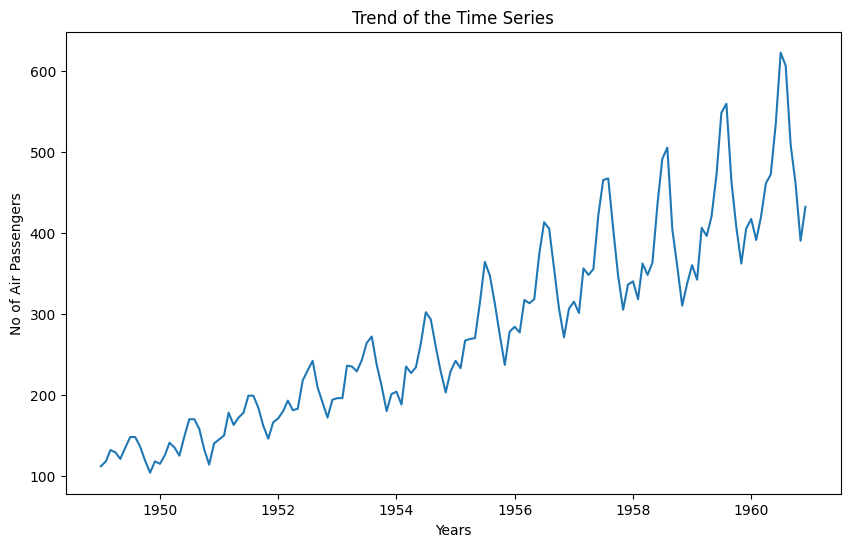

In [ ]:
# plt.figure(figsize= (10,6))
plt.plot(data)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')
plt.show()

As you can see from above plot there is upward trend of number of passenger for every year. 

### Variance
In above graph you can clearly see that the variation is also increasing with the level of the series. You will see in the later part of this exercise how we handle the variance to increase the stationarity of the series.

### Seasonality
We can also see the graph going up and down at regular interval, that is the sign of seasonality. Let's plot the graph for few months to visualize for seasonality.

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

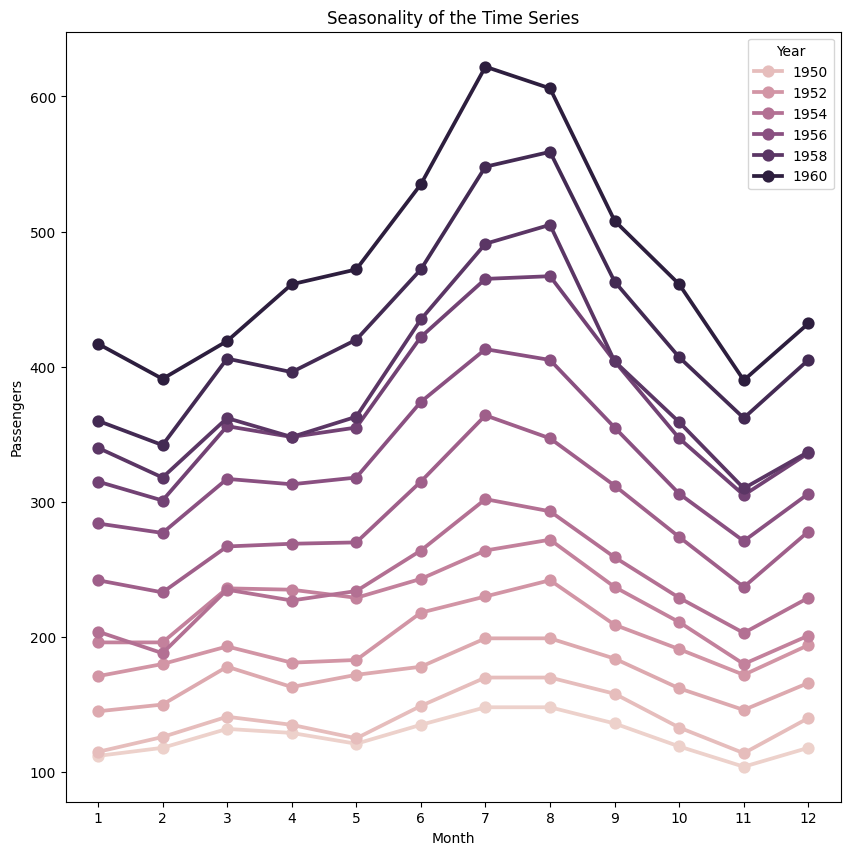

In [ ]:
# To plot the seasonality we are going to create a temp dataframe 
# and add columns for Month and Year values
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month

# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=data_temp)

From above graph we can say that every year in month of July we observe maximum number of passengers and similarly minimum number of passenger in the month of November.

### Decomposition of Time Series
Let's now use the decomposition technique to deconstruct the time series data into several component like trend and seasonality for visualization of time series characteristics.

Here we are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns.

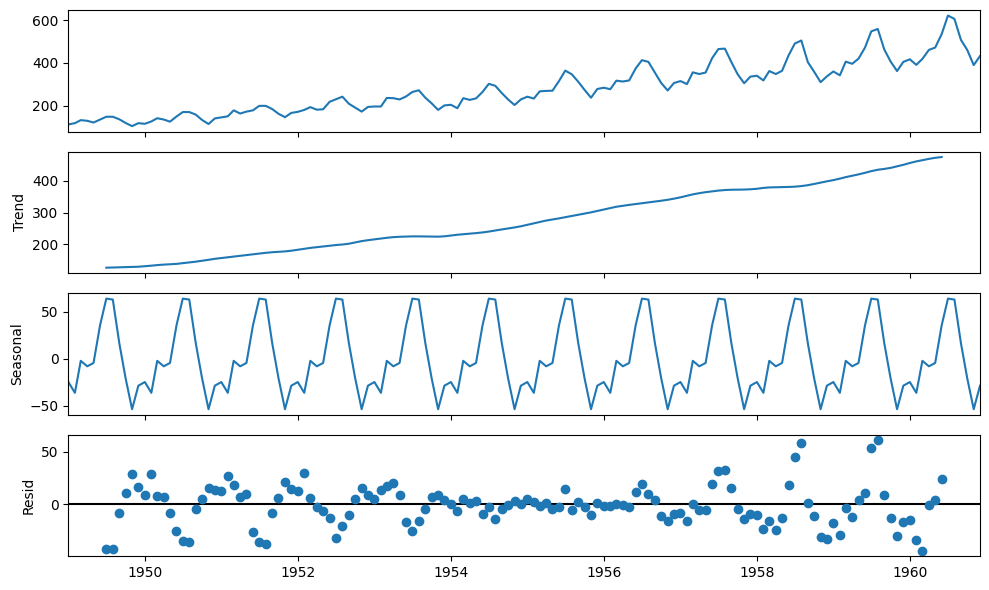

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(
    data, 
    model='additive')
 
fig = decomposition.plot()

[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline_horizontal -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="9021194372"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

## Time Series Analysis <a id ="33"></a>
So our time series has variance, trend and seasonality characteristics. During our analysis we are going to try multiple techniques to make time series stationary and record the stationarity scores for each method. Finally, we will select the method, which is easy for inverse transformation easy and give best stationarity score.

### Check for Stationarity
We are going to use rolling statistics and Dickey-Fuller test to check the stationarity of the time series

In [ ]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

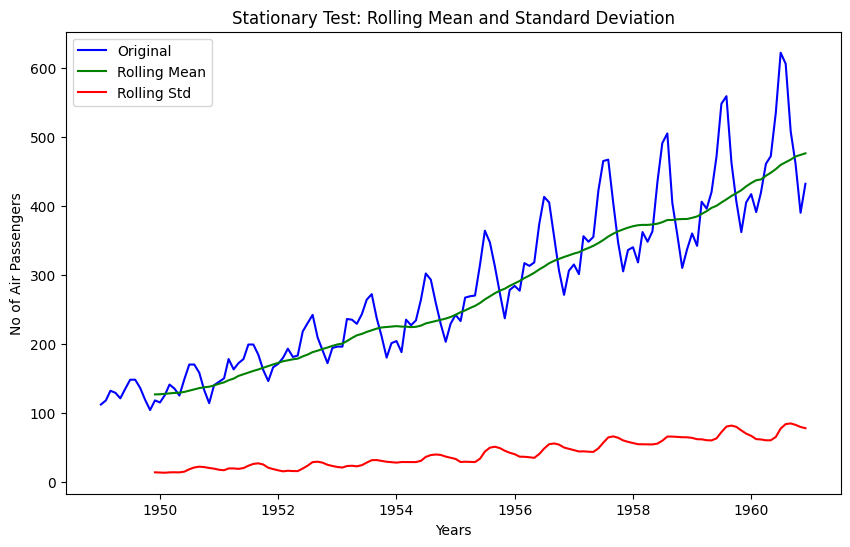

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
# Lets test the stationarity score with original series data
stationarity_test(data)

Though it's clear from visual observation that it's not a stationary series, but still lets have look at the rolling statistics and Duckey Fuller test results

* Rolling statistics: Standard deviation has very less variation but mean is increasing continuously.
* Duckey Fuller Test: Test statistic is way more than the critical values.

### Convert Non-Stationary Data to Stationary Data
Let's first use the differencing technique to obtain the stationarity.

#### Differencing
To transform the series using *Differencing* we will use the `diff()` method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

 $$Y_t' = Y_t - Y_{t-1}$$

[<matplotlib.lines.Line2D>]

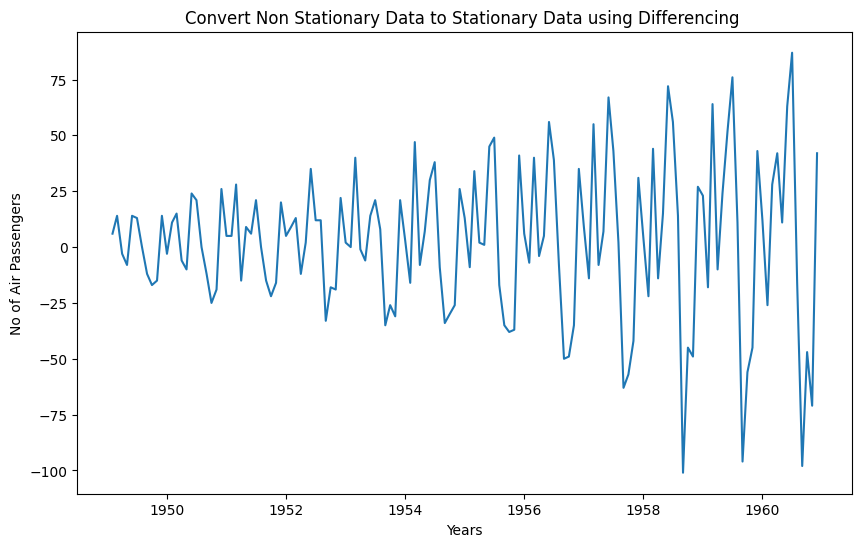

In [ ]:
data_diff = data.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(data_diff)

So from above graph its clear that differencing technique removed the trend from the time series, but variance is still there Now lets run the `stationarity_test()` to check the effectiveness of the 'Differencing' technique

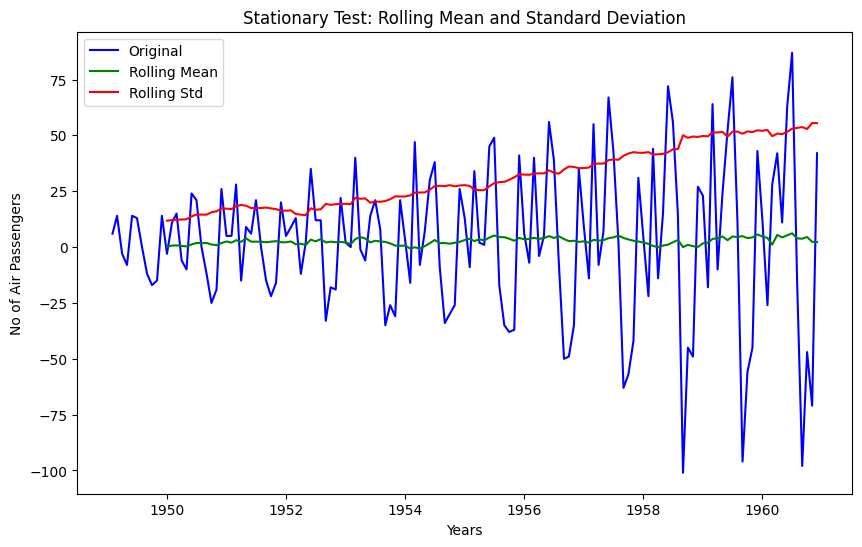

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
data_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(data_diff)

The rolling values appear to be varying slightly, and we can see there is slight upward trend in standard deviation. Also, the test statistic is smaller than the 10% critical but since p-value is greater than 0.05 it is not a stationary series.

Note that variance in the series is also affecting above results, which can be removed using transformation technique.

Let's also check with transformation technique

#### Transformation

Since variance is proportional to the levels, we are going to use the log transformation.

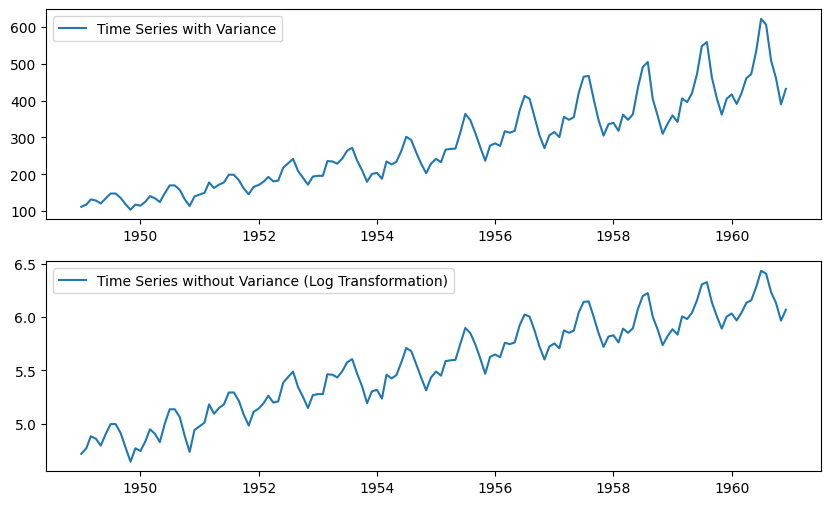

In [ ]:
# apply the log transformation
data_log = np.log(data)

# let's plot the results
plt.subplot(211)
plt.plot(data, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(data_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

Since log transformation has removed the variance from series, lets use this transformed data hence forward. 
Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.
```
    df = exp(df_log)
```

Let cross-check the differencing method scores with this log transformed data again.

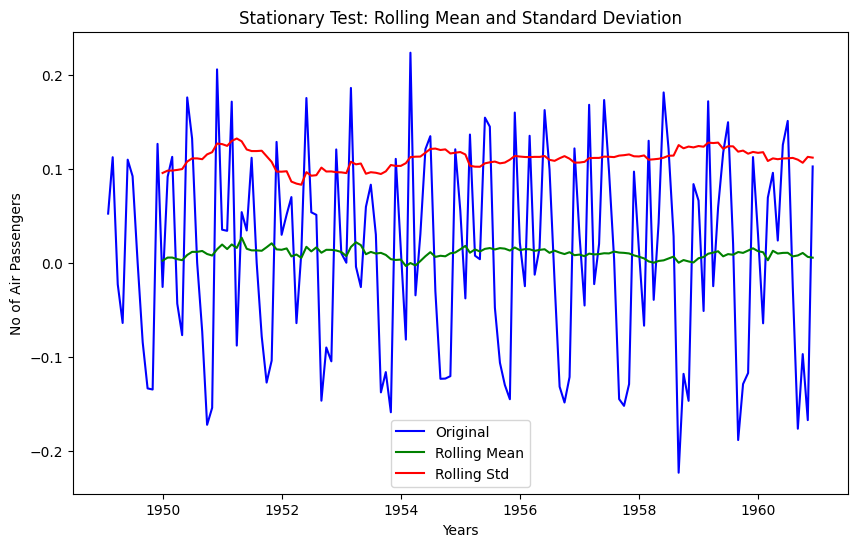

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
# First order differencing
data_log_diff = data_log.diff(periods = 1) 

# Data transformation may add na values
data_log_diff.dropna(inplace = True)
stationarity_test(data_log_diff)

The rolling mean and standard deviation values are okay now. The test statistic is smaller than the 10% critical values but since p-value is greater than 0.05 it is not a stationary series.

Let's also check with Moving Average technique…

#### Moving Average

Since we have time series data from 1 Jan 1949 to 1 Dec 1960, we will define a yearly window for moving average. Window size = 12. Note that we are going to use Log transformed data.

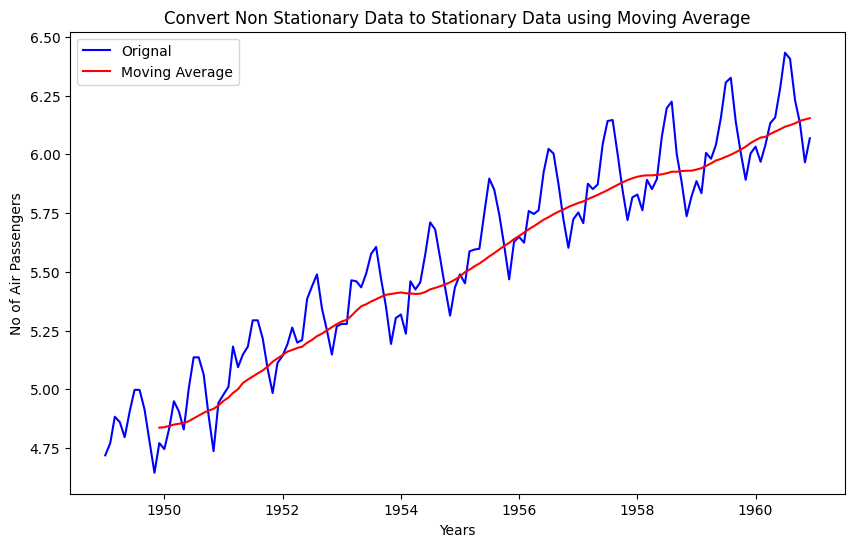

In [ ]:
data_log_moving_avg = data_log.rolling(window = 12).mean()

# let's plot the results
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(data_log, color= 'blue', label='Orignal')
plt.plot(data_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()
plt.show()

As you can see from above graph that data is more smooth without any variance. If we use the differencing technique with log transformed data and mean average data then we should get better stationarity scores

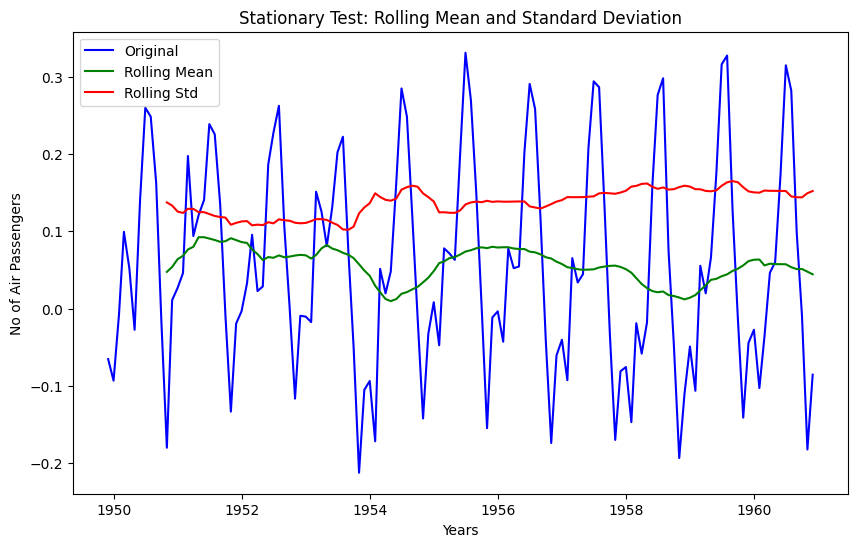

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
data_log_moving_avg_diff = data_log - data_log_moving_avg
data_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(data_log_moving_avg_diff)

As expected now we are able to see some real improvements. p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

In order to increase the stationarity of the series lets try to use 'Weighted Moving Average' technique

#### Weighted Moving Average (WMA)

Here we are going to use exponentially weighted moving average with parameter ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

[<matplotlib.lines.Line2D>]

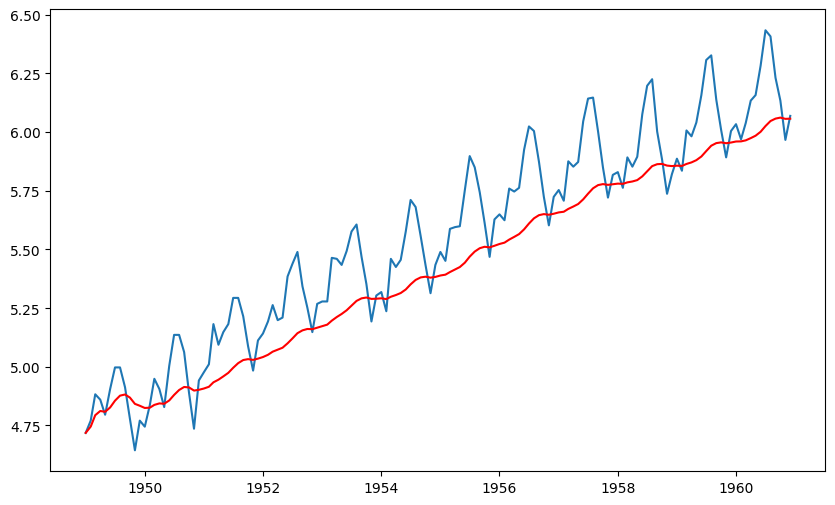

In [ ]:
data_log_weighted_avg = data_log.ewm(halflife = 12).mean()
plt.plot(data_log)
plt.plot(data_log_weighted_avg, color = 'red')

Notice that WMA follow's no of passenger values more closely than a corresponding Simple Moving Average which also results in more accurate trend direction. Now lets check, the effect of this on stationarity scores!

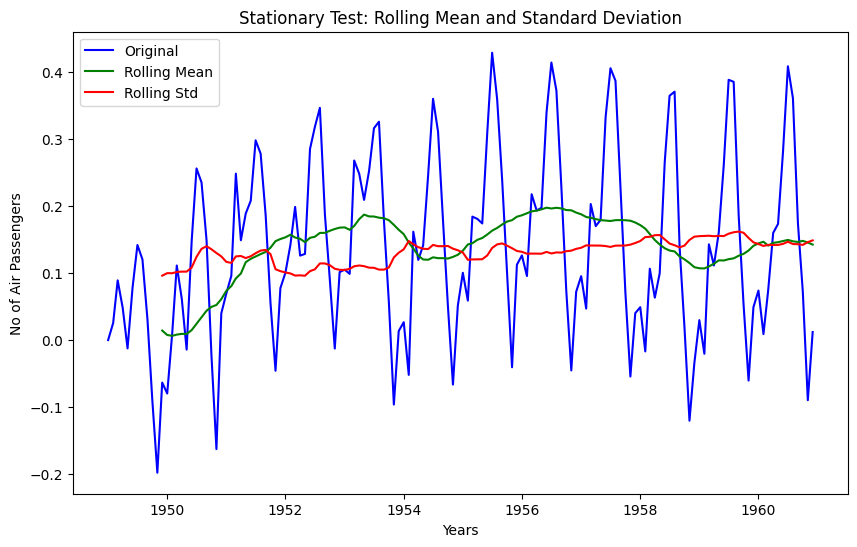

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
data_log_weighted_avg_diff = data_log - data_log_weighted_avg
stationarity_test(data_log_weighted_avg_diff)

Test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

There is one more way to obtain better stationarity is by using the residual data from time series decomposition.

#### Decomposition of Time Series

Let's now use the decomposition technique to deconstruct the log transformed time series data, so that we can check the stationarity using residual data.

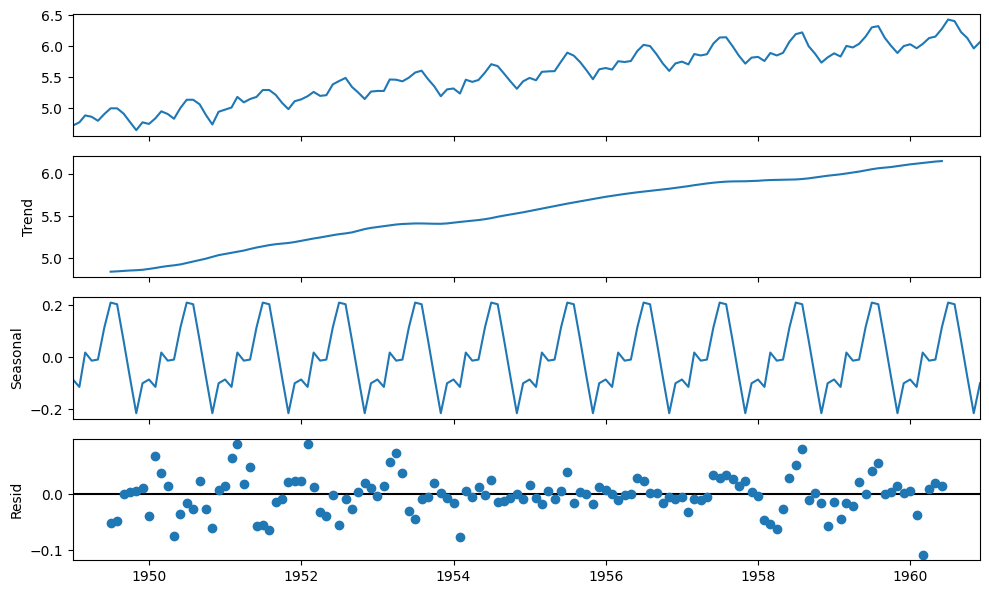

In [ ]:
import statsmodels.api as smapi

decomposition = smapi.tsa.seasonal_decompose(data_log,period =12)
fig = decomposition.plot()

Here we can see that the trend and seasonality are separated out from log transformed data, and we can now check the stationarity of the residuals

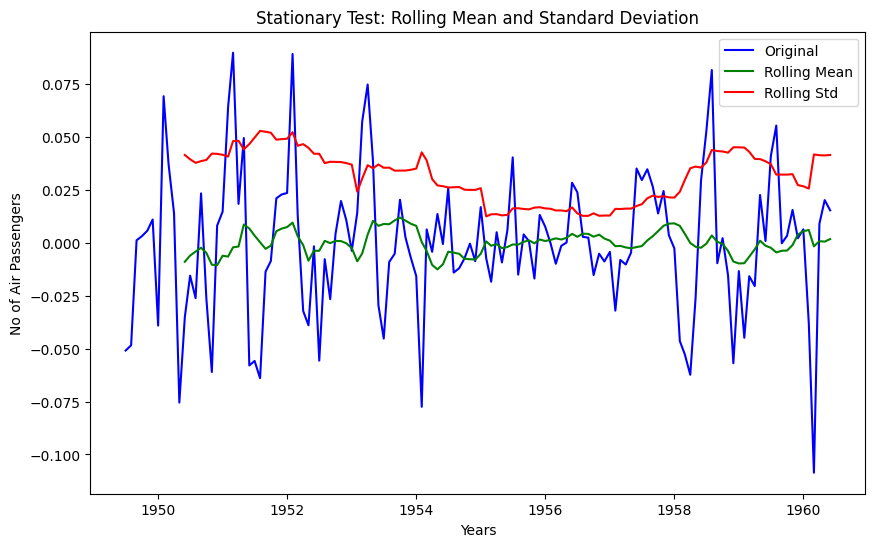

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
data_log_residual = decomposition.resid
data_log_residual.dropna(inplace = True)
stationarity_test(data_log_residual)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value and p-value is almost 0. So this time series is very close to stationary. This concludes our time series analysis and data transformation to get the stationary series. Now we can start modeling it for forecast.

## Forecasting 
* Though using residual values gives us very good results, but it's relatively difficult to add noise and seasonality back into predicted residuals in this case. 
* So we are going to make model on the time series(`df_log_diff`), where we have used log transformation and differencing technique. This is one of the most popular and beginner-friendly technique. As per our time series analysis `df_log_diff` is not a perfectly stationary series, that's why we are going to use statistical models like ARIMA to forecast the data.
* Remember that ARIMA model uses three parameters, `p` for the order of Auto-Regressive (AR) part, `q` for the order of Moving Average (MA) part and `d` for the order of integrated part. We are going to use `d=1` but to find the value for `p` and `q` lets plot ACF and PACF.
* Note that since we are using `d=1`, first order of differencing will be performed on given series. Since first value of time series don't have any value to subtract from resulting series will have one less value from original series

### ACF and PACF Plots
* To figure out the order of AR model(p) we will use PACF function. `p` = the lag value where the PACF chart crosses the upper confidence interval for the first time
* To figure out the order of MA model(`q`) we will use ACF function. `q` = the lag value where the ACF chart crosses the upper confidence interval for the first time

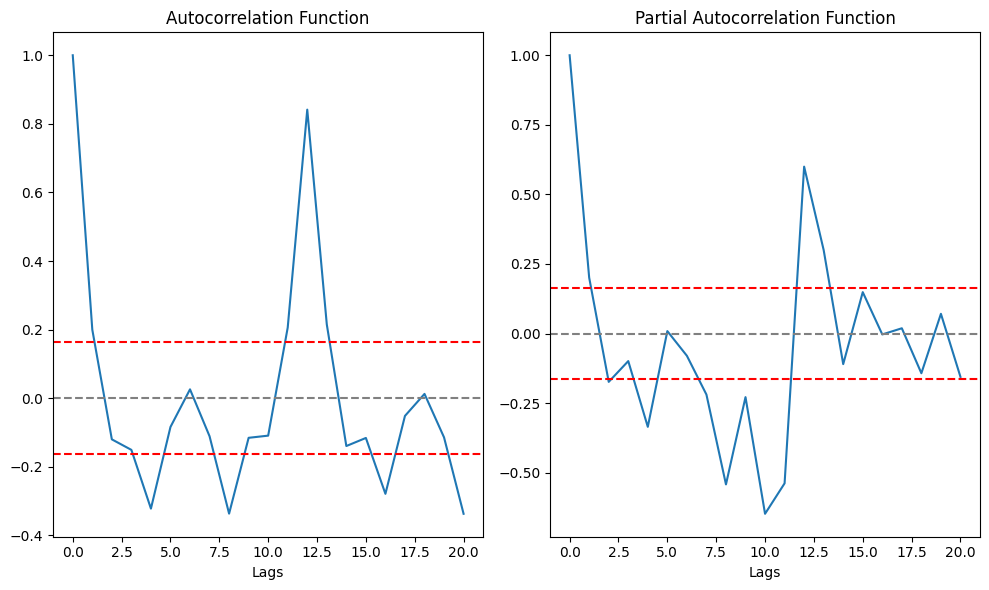

In [ ]:
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From above graph its clear that p=2 and q=2. Now we have the ARIMA parameters values, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS(Residual Sum of Square) metric for each. Please note that here RSS is for the values of residuals and not actual series.

### AR Model
Since `q` is MA model parameter we will keep its value as `0`.

In [ ]:
# # freq = 'MS' > The frequency of the time-series MS = calendar month begin
# # The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
# model = ARIMA(data_log, order=(2, 1, 0), freq = 'MS')  
# results_AR = model.fit()
# plt.plot(data_log_diff)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - data_log_diff['Passengers'])**2))
# plt.show()

### MA Model
Since 'p' is AR model parameter we will keep its value as '0'.

In [ ]:
# model = ARIMA(data_log, order=(0, 1, 2), freq = 'MS')  
# results_MA = model.fit()  
# plt.plot(data_log_diff)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues-data_log_diff['Passengers'])**2))

### Combined Model

In [ ]:
# model = ARIMA(data_log, order=(2, 1, 2), freq = 'MS')  
# results_ARIMA = model.fit(disp=-1)  
# plt.plot(data_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff['Passengers'])**2))

Here we can see that the AR and MA models have almost the same RSS score but combined is significantly better. So we will go ahead with combined ARIMA model and use it for predictions.

### Prediction and Reverse Transformation
* We will create a separate series of predicted values using ARIMA model
* Reverse transform the predicted values to get the original scale back
* Compare the predicted values with original values and plot them

In [ ]:
# # Create a separate series of predicted values
# predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

# print('Total no of predictions: ', len(predictions_diff))
# predictions_diff.head()

Since we are using first order of differencing(d =1), there is no prediction available for first value (1949-02-01) of original series. In order to remove 'differencing transformation' from the prediction values we are going to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. We are going to use pandas cumsum() function for it.

In [ ]:
# predictions_diff_cumsum = predictions_diff.cumsum()
# predictions_diff_cumsum.head()

Above values once added to the base number will completely remove the differencing transformation. For this, lets create a series with all values as base number and add the 'predictions_diff_cumsum' to it.

In [ ]:
# predictions_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index) # Series of base number
# predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
# predictions_log.head()

So as of now we have removed the differencing transformation, now lets remove the log transformation to get the original scale back.

In [ ]:
# predictions = np.exp(predictions_log)
# plt.plot(df)
# plt.plot(predictions)

In [ ]:
# df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
# pd.concat([df,df_predictions],axis =1).T

### Future Forecasting
* We have data from 1 Jan 1949 to 1 Dec 1960. 12 years of data with passenger number observation for each month i.e. 144 total observations.
* If we want to forecast for next 5 years or 60 months then, ‘end’ count will be >  144 + 60 = 204.
* We are going to use statsmodels plot_predict() method for it

In [ ]:
# results_ARIMA.plot_predict(start = 1, end= 204) 

In [ ]:
# # Forecasted values in original scale will be
# forecast_values_log_scale = results_ARIMA.forecast(steps = 60)
# forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

# forecast_date_range= pd.date_range("1961-01-01", "1965-12-01", freq="MS")

# df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
# df_forecast['Month'] = forecast_date_range

# df_forecast[['Month', 'Forecast']]

<p class=pb-1>
To be among the first to hear about future updates, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
 (formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataidea-science"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>
<iframe src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no" style="margin: 0; border-radius: 0px !important; background-color: transparent; width: 100%;" ></iframe>

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline_horizontal -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="9021194372"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

<h2>What's on your mind? Put it in the comments!</h2>
<script src="https://utteranc.es/client.js"
        repo="dataideaorg/dataidea-science"
        issue-term="pathname"
        theme="github-light"
        crossorigin="anonymous"
        async>
</script>